In [12]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

### Constants

In [13]:
LOSSES_PATH = '../data/losses.pkl'
METRICS_PATH = '../data/metrics.pkl'
COLOR = '#e31c60'

In [14]:
losses = pd.read_pickle(open(LOSSES_PATH, 'rb'))[['epoch', 'looses', 'mean', 'std']]
metrics = pd.read_pickle(open(METRICS_PATH, 'rb'))[['epoch', 'class_accuracy', 'noobj_accuracy', 'obj_accuracy', 'map']]

In [15]:
len(losses)

114

### Analysis

#### Loss metrics

For this analysis, we will use the following metrics:
- [Binary Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a): used for not object loss.
- [Cross Entropy](https://towardsdatascience.com/an-intuitive-guide-how-entropy-connects-to-cross-entropy-78b0713494a9): used for class loss.
- [Mean Squared Error](https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958#:~:text=MSE%20is%20the%20average%20of,values%20and%20the%20predicted%20ones.&text=Then%20we%20take%20the%20average,data%20are%20of%20the%20population.): used for box loss (intersection over union) and coordinate loss (distance between two points)

In addition based on [YOLOv3 Loss calculation](https://towardsdatascience.com/calculating-loss-of-yolo-v3-layer-8878bfaaf1ff), we defined the following factors that signify how much to pay for each respective part of the loss:
- Class loss: 1
- No object loss: 10
- Object loss: 1
- Box loss (intersection and coordinates): 10

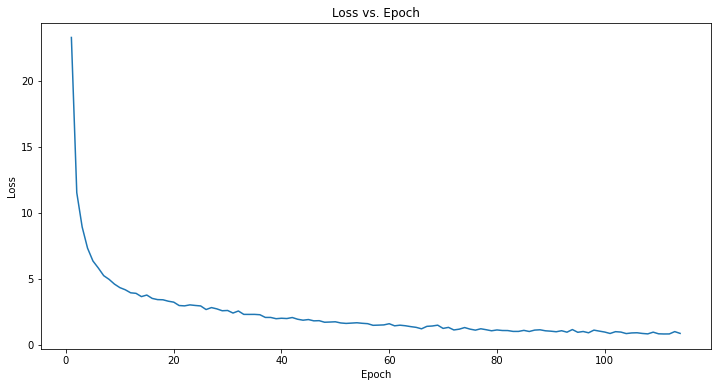

In [6]:
plt.figure(figsize=(12, 6))
loss_plot = sns.lineplot(x='epoch', y='mean', data=losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#loss_plot.lines[0].set_color(COLOR)
loss_plot.figure.savefig('../img/loss_plot_a.png', dpi=150)
#increase font size
plt.rcParams.update({'font.size': 24})

#### Metrics analysis
- Class acurrary: total number of correct predictions divided by total number of predictions
- No object acurrary: total number of correct predictions divided by total number of predictions
- Object acurrary: total number of correct predictions divided by total number of predictions
- Map: average precision through 6 classes

Class Accuracy: 90.66667175292969
Max 90.66667175292969


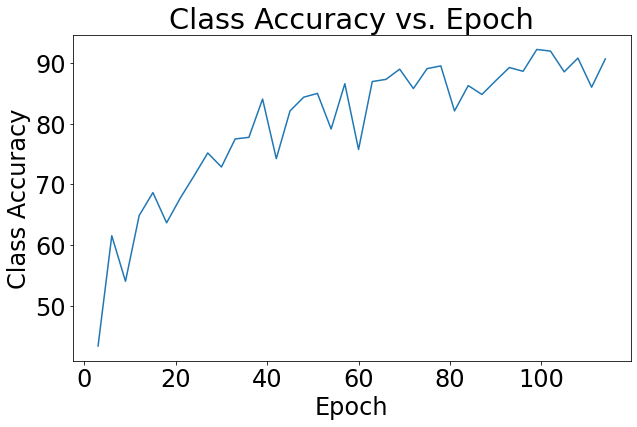

In [7]:
plt.figure(figsize=(10, 6))
ca_plot = sns.lineplot(x='epoch', y='class_accuracy', data=metrics)
plt.title('Class Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Class Accuracy')
#change line tu magenta
#ca_plot.lines[0].set_color(COLOR)
ca_plot.figure.savefig('../img/ca_plot_a.png', dpi=150)
print('Class Accuracy:', metrics.iloc[-1]['class_accuracy'])
print('Max', metrics.iloc[-1]['class_accuracy'].max())


No Object Accuracy: 99.9296646118164
Max 99.9795150756836


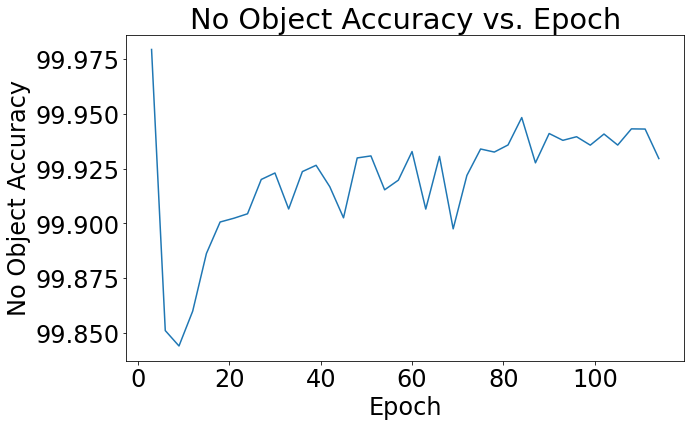

In [8]:
plt.figure(figsize=(10, 6))
noa_plot = sns.lineplot(x='epoch', y='noobj_accuracy', data=metrics)
plt.title('No Object Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('No Object Accuracy')
#noa_plot.lines[0].set_color(COLOR)
noa_plot.figure.savefig('../img/noa_plot_a.png', dpi=150)
print('No Object Accuracy:', metrics.noobj_accuracy.iloc[-1])
print('Max', metrics.noobj_accuracy.max())

Object Accuracy: 95.46666717529297
Max 95.46666717529297


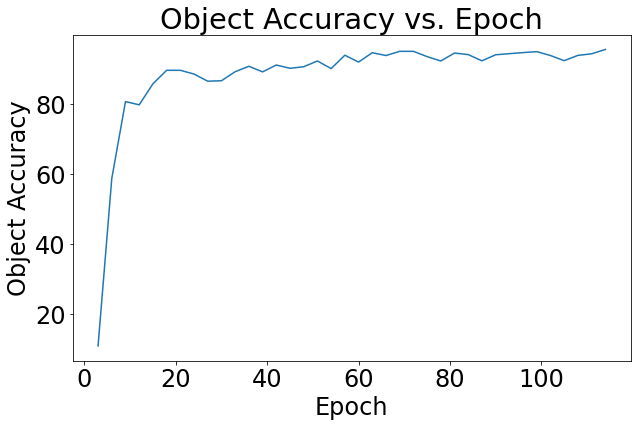

In [11]:
plt.figure(figsize=(10, 6))
oa_plot = sns.lineplot(x='epoch', y='obj_accuracy', data=metrics)
plt.title('Object Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Object Accuracy')
#oa_plot.lines[0].set_color(COLOR)
oa_plot.figure.savefig('../img/oa_plot_a.png', dpi=150)
print('Object Accuracy:', metrics.obj_accuracy.iloc[-1])
print('Max', metrics.obj_accuracy.max())

MAP 0.7546246647834778
Max 0.7928073406219482


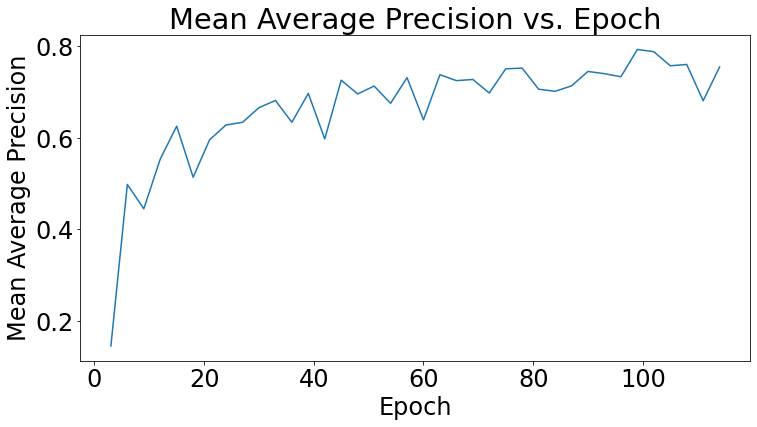

In [10]:
plt.figure(figsize=(12, 6))
metrics['map'] = metrics['map']
map_plot = sns.lineplot(x='epoch', y='map', data=metrics)
plt.title('Mean Average Precision vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision')
#map_plot.lines[0].set_color(COLOR)
map_plot.figure.savefig('../img/map_plot_a.png', dpi=150)
print('MAP', metrics['map'].iloc[-1])
print('Max', metrics['map'].max())